Suavizado Exponencial
===

* 34:29 min | Ultima modificación: Marzo 21, 2021 | YouTube

## Suavizado exponencial simple

El modelo de suavizado exponencial simple se basa en el supuesto de que se tiene el valor real de la serie para el periodo $t$, $y_t$, y el pronóstico para ese mismo periodo $S_t$. En este caso, el pronóstico $S_{t+1}$ se calcula como el pronóstico para el periodo actual $S_t$ más un término de corrección del error cometido:

$$S_{t+1} = S_t + \alpha (y_t - S_{t}) $$

Donde:

* $S_{t+1}$ -- Es el  valor pronosticado para el siguiente periodo
* $S_t$ --  Es el valor estimado o pronósticado para el periodo actual. 
* $y_t$ -- Es el dato actual en el periodo de tiempo. 
* $(y_t - S_{t})$ -- La  estimación de error en el pronóstico del valor para el periodo actual.
* $\alpha$ -- Es el factor de correción del error.

Reorganizando terminos, la ecuación anterior se puede escribir como:

$$ S_{t+1} =  \alpha ~y_t + (1 - \alpha) S_t$$ 

o, en terminos genéricos:

Pronóstico siguiente periodo = (Peso) $\times$ (Observación del periodo actual) + (1 - peso) $\times$ (Pronóstico periodo actual).

La ecuación anterior permite usar recursión ya que: 

$$S_t = \alpha ~y_{t-1} + (1 - \alpha)S_{t-1}$$

**Ejercicio.---** Demuestre que:

$$S_{t+1} = \alpha y_t + \alpha(1- \alpha)y_{t-1} + \alpha(1- \alpha)^2 y_{t-2} + \alpha(1- \alpha)^3 y_{t-3}+ ... + \alpha(1- \alpha)^{t-1}y_{1}+(1- \alpha)^t S_{0}$$

## Suavizado exponencial doble-Método de Brown

La tecnica y los argumentos utilizados en el suavizado exponencial doble son similares al del suavizado simple. Si se tiene: 

$$S_{t+T} = a_t + b_t(T)$$

Representa el pronóstico actualizado, entonces:

*  $a_t = 2S_{t+1} - S_{t+1}^{(2)} $ : Es el intercepto actualizado


*  $b_t = \frac {\alpha}{1-\alpha} (S_{t+1} - S_{t+1}^{(2)})$: Es la pendiente actualizada


* $T$: Número de periodos adelante.


$S_{t+1}$ y $S_{t+1}^{(2)}$ son los estadisticos dobles e individuales suavizados encontrados al aplicar la ecuación de suavizamiento.

$S_{t+1}= y_t + (1-\alpha)S_{t}$


$S_{t+1}^{(2)} = \alpha S_{t+1} + (1-\alpha)S_{t}^{(2)}$

Una vez que los estadisticos individuales y dobles suavizados se calculan para un periodo de tiempo, los valores pueden ser sustituidos dentro de la actualización de las formulas para el intecepto y la pendiente para encontrar un pronóstico.

Para empezar el proceso del suavizado exponencial doble, los valores iniciales de las estimaciones suavizadas pueden ser obtenidas. Esto se puede lograr mediante la sustitución de los valores para el intercepto y pendiente estimada $a$ y $b$ a partir del análisis de regresión lineal en las siguientes ecuaciones

* $S_0 = a - [\frac {1-\alpha}{\alpha}] \times b$

* $S_{0}^{(2)} = a - 2[\frac {1-\alpha}{\alpha}] \times b $

In [16]:
## datos
x <-ts(data = c(13.98, 16.81, 16.60, 17.86,
                17.10, 19.80, 19.79, 22.94,
                20.72, 24.02, 23.56, 25.43,
                23.43, 24.70, 27.56, 28.63,
                29.86, 27.42, 28.59, 30.41, 
                33.41, 28.80, 34.96, 34.69),
       freq = 4,
       start = c(2010, 1))

x.fit <- window(x, start = c(2010, 1), end = c(2014, 4))
x.for <- window(x, start = c(2015, 1), end = c(2015, 4))
x.fit
x.for

      Qtr1  Qtr2  Qtr3  Qtr4
2010 13.98 16.81 16.60 17.86
2011 17.10 19.80 19.79 22.94
2012 20.72 24.02 23.56 25.43
2013 23.43 24.70 27.56 28.63
2014 29.86 27.42 28.59 30.41

      Qtr1  Qtr2  Qtr3  Qtr4
2015 33.41 28.80 34.96 34.69

## Suavizado exponencial triple

[Contenido](#Contenido)

$S_{t+1}= \alpha Y_t + (1-\alpha)S_{t}$


$S_{t+1}^{(2)} = \alpha S_{t+1} + (1-\alpha)S_{t}^{(2)}$


$S_{t+1}^{(3)} = \alpha S_{t+1}^{(2)} + (1-\alpha)S_{t}^{(3)}$

Si se tiene:

$\hat Y_{t+1} = a_t + b_{1,t}(T)+ \frac {1}{2} b_{2,t}({T^2}) $

Entonces:

* $a_t = 3S_{t+1} - 3S_{t+1}^{(2)} + S_{t+1}^{(3)} $
 
 Es la actualización del intercepto, y luego:
 
* $b_{1,t}= \frac {\alpha}{2 \times {(1-\alpha)^2}} [(6-5\alpha)S_{t+1} - 2(5-4\alpha)S_{t+1}^{(2)} + (4-3\alpha)S_{t+1}^{(3)}]$

*  $b_{2,t}= (\frac {{\alpha^2}}{({1-\alpha})^2}) (S_{t+1} - 2 S_{t+1}^{(2)} + S_{t+1}^{(3)}) $

Son la actualización de las pendientes para el pronóstico de un periodo, es decir $T=1$. Para esta metodología los valores iniciales de las estimaciones suavizadas pueden ser obtenidas:

* $S_0 = a - \frac {(1-\alpha)}{\alpha} \times (b_1) + \frac {(1-\alpha)(2-\alpha)}{2 {\alpha^2}} \times (2 b_2)$


* $S_0^{(2)} = a - \frac {2(1-\alpha)}{\alpha} \times (b_1) + \frac {2(1-\alpha)(3-2\alpha)}{2 {\alpha^2}} \times (2 b_2)$


* $S_0^{(3)} = a - \frac {3(1-\alpha)}{\alpha} \times (b_1) + \frac {3(1-\alpha)(4-3\alpha)}{2 {\alpha^2}} \times (2 b_2)$


Donde $a$, $b_1$ y $b_2$ son la estimación de los parametros obtenidos por una regresión lineal multiple. 

In [25]:
## Serie con Tendencia y Ciclo

x <-ts(data = c( 12.82, 13.03, 11.58, 11.77, 
                 12.84, 13.07, 12.36, 12.14,
                 12.96, 13.63, 12.83, 12.16,
                 13.98, 13.88, 13.14, 13.27,
                 13.90, 14.24, 13.46, 13.25,
                 14.54, 14.45, 14.08, 13.83),
       freq = 4,
       start = c(2010,01))


x.fit <- window(x, start = c(2010, 1), end = c(2014, 4))
x.for <- window(x, start = c(2015, 1), end = c(2015, 4))
x.fit
x.for

      Qtr1  Qtr2  Qtr3  Qtr4
2010 12.82 13.03 11.58 11.77
2011 12.84 13.07 12.36 12.14
2012 12.96 13.63 12.83 12.16
2013 13.98 13.88 13.14 13.27
2014 13.90 14.24 13.46 13.25

      Qtr1  Qtr2  Qtr3  Qtr4
2015 14.54 14.45 14.08 13.83

## Pronóstico suavizado exponencial triple serie de tiempo de componentes aditiva

[Contenido](#Contenido)

In [31]:
y1 <- predict(m1, n.ahead = 4, prediction.interval = TRUE)    
y2 <- predict(m2, n.ahead = 4, prediction.interval = TRUE)     
y1
y2

fit,upr,lwr
14.28943,15.05028,13.52859
14.57765,15.52871,13.62658
13.70341,14.92136,12.48545
13.50991,15.05521,11.96462


fit,upr,lwr
14.51833,15.07950,13.95715
14.76814,15.33104,14.20523
13.90854,14.47431,13.34277
13.82113,14.39117,13.25110


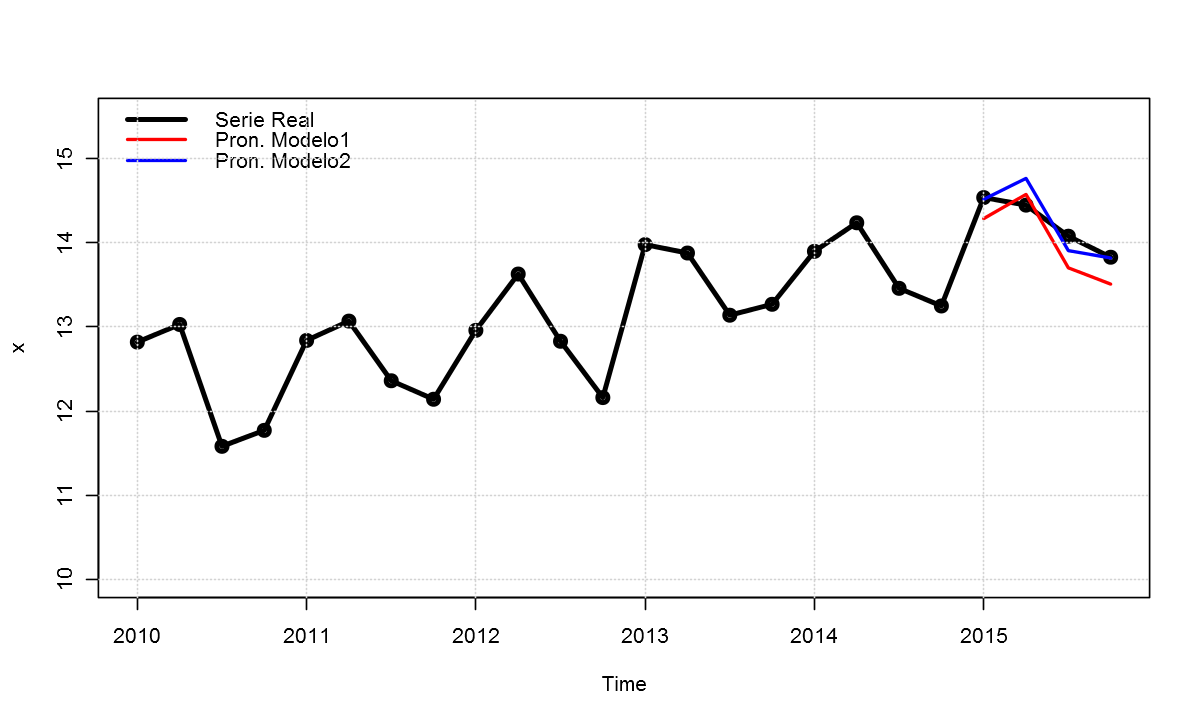

In [32]:
## pronóstico
plot(x, type = "o", lwd = 3, ylim = c(10,15.5))

lines(y1[,1], col = "red",  lwd = 2)
lines(y2[,1], col = "blue", lwd = 2)

legend( "topleft", 
        c("Serie Real","Pron. Modelo1","Pron. Modelo2"),
        lwd = c(3, 2, 2),
        col = c('black', 'red', 'blue'),
        bty = "n")

grid()

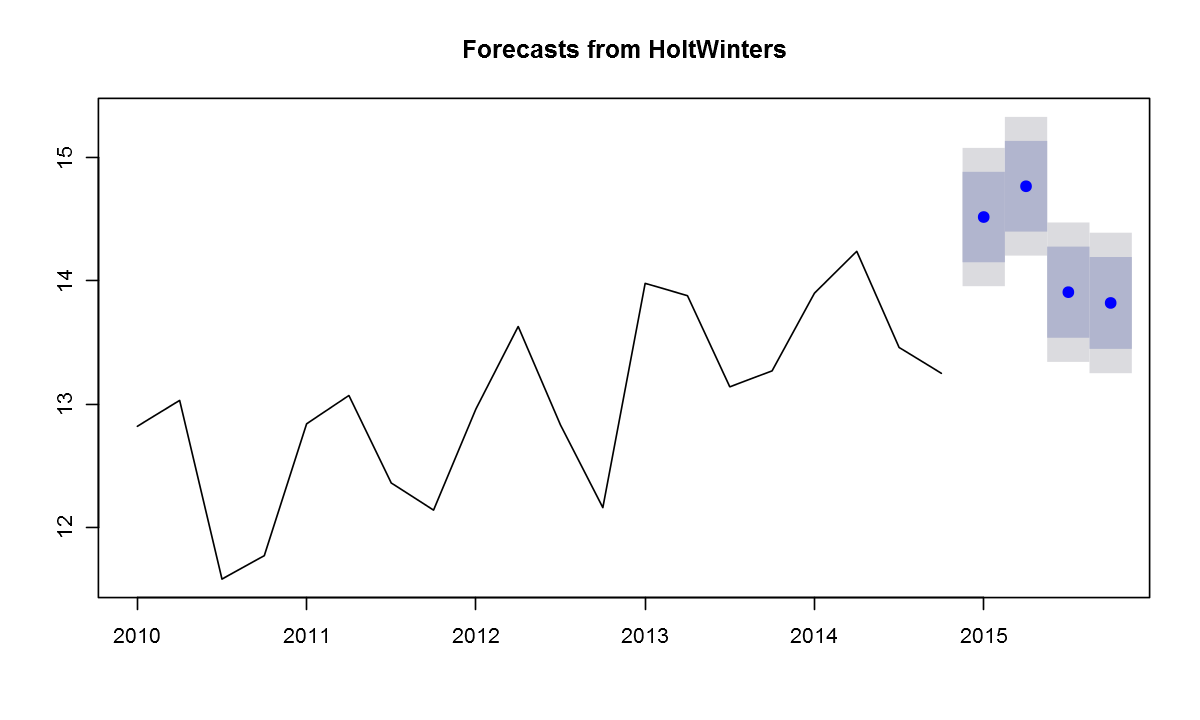

In [33]:
## pronóstico utilizando función forecast.Holwinters
y <- forecast.HoltWinters(m2, h = 4)
plot.forecast( y )

**Ejercicio.--** Realice el pronóstico para los 8 periodos siguiente con el mejor modelo y realice la gráfica.


---


## Suavizado exponencial triple serie de tiempo de componentes multiplicativas

[Contenido](#Contenido)

Una serie de tiempo de componentes multiplicativas, es expresada como:

$$ y_t = T_t * S_t * E_t $$


In [34]:
## datos
x     <- AirPassengers
x.fit <- window(x, start = c(1949, 1), end = c(1959, 12))
x.for <- window(x, start = c(1960, 1), end = c(1960, 12))
x.fit
x.for

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1960 417 391 419 461 472 535 622 606 508 461 390 432

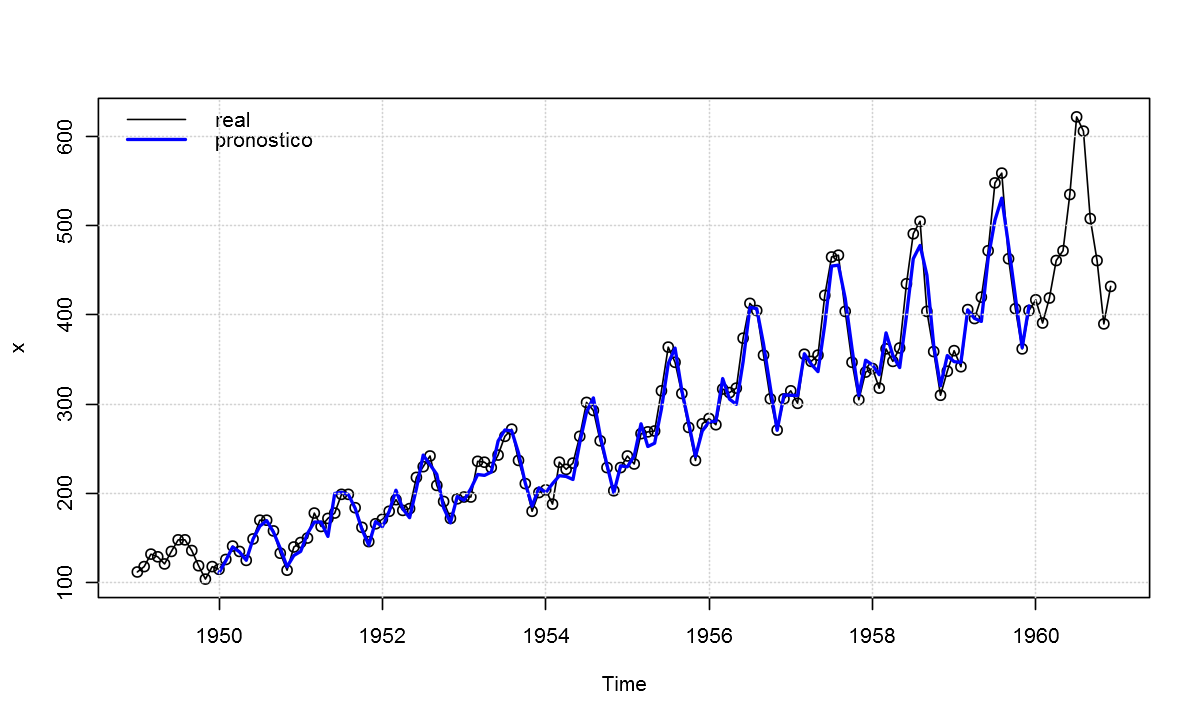

In [35]:
## Ajuste del modelo 
m <- HoltWinters(x.fit, seasonal ="multiplicative")

## gráfica
plot(x,
     type = "o")

lines(m$fitted[,1], col="blue", lwd=2)

legend("topleft",
       c("real","pronostico"),
       lwd=c(1, 2),
       col=c('black', 'blue'),
       bty = "n")

grid()

## Pronóstico suavizado exponencial triple serie de tiempo de componentes multiplicativas


[Contenido](#Contenido)


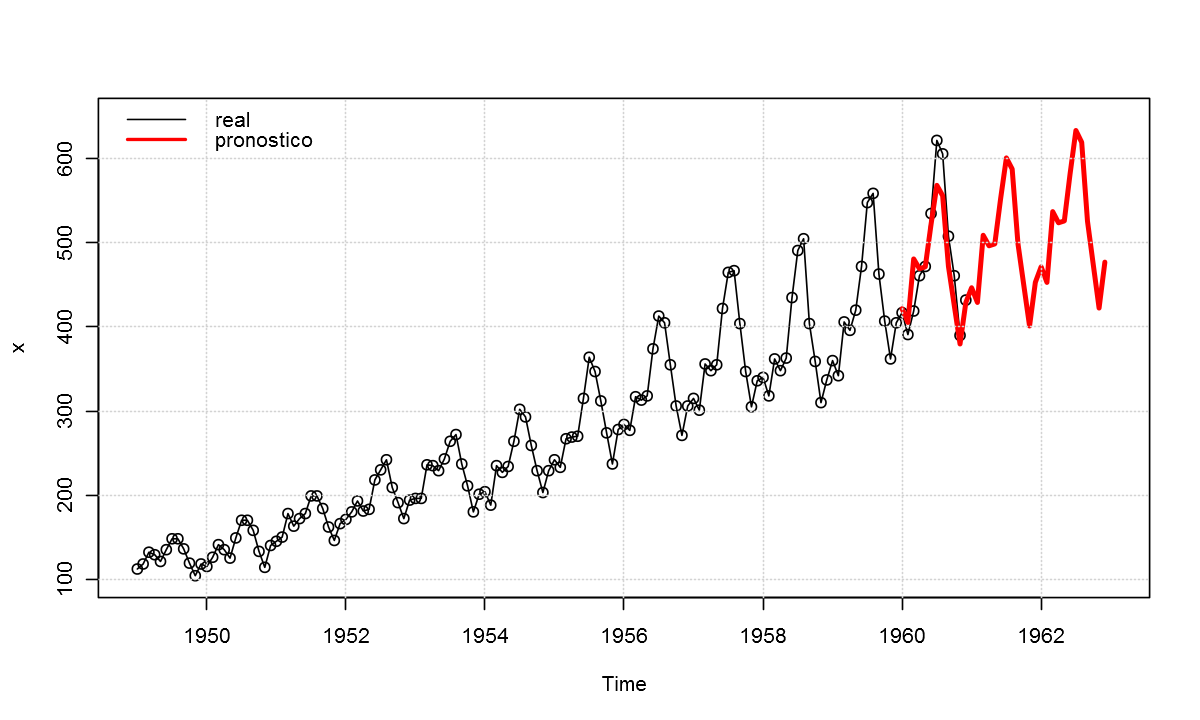

In [36]:
## pronóstico
y.pron <- predict(m, n.ahead=36, prediction.interval=TRUE)


plot(x, type = "o", 
     ylim=c(100,650), 
     xlim=c(1949, 1963), 
     lwd = 1)

lines(y.pron[,1],
      col = "red",
      lwd = 3)

legend("topleft",
       c("real","pronostico"),
       lwd = c(1, 2),
       col = c('black', 'red')
       , bty = "n")

grid()

---

**Ejercicio.--** Pronostique la serie  `data/paper.dat`.

**Ejercicio.--** Pronostique la serie `data/sutter.dat`.

---


[Contenido](#Contenido)


---

## Modelo de Holt-Winters aditivo

### Generación de series sintéticas

**Ejercicio.--** Grafique una serie sintética (T=100) para el siguiente modelo:

$$y_{t+h}=a_t + h*b_t + s_{t-P+1 + (h-1) mod P} + e_t $$

con:  $y_1$ = 10.0, $a_1$ = 13.90, $b_1$ = 0.11, $s_1$ = 0.49, $s_2$ = 0.63, $s_3$ = -0.33, $s_4$ = -0.53; y $\sigma$ = 0.5.


### Pronóstico

**Ejercicio.--** Para la serie del ejercicio anterior, tome las 100 observaciones como la serie real y pronostique las siguientes 20, con intervalos de confianza de una desviación estándar.

### Estimación

Con $h$ = 1 se obtienen los pronósticos para el siguiente período adelante.

$$z_{t+h}=a_t + h*b_t + s_{t-P+1 + (h-1) mod p}$$

con:

$$a_t = \alpha * (y_t  - s_{t-P}) + (1-\alpha)(a_{t-1} + b_{t-1})$$

$$b_t = \beta * (a_t - a_{t-1}) + (1 - \beta) b_{t-1}$$

$$s_t = \gamma(y_t-a_t) + (1 - \gamma)*s_{t-p}$$

La estimación de los parámetros óptimos se basa en minimizar la suma del error cuadrático:

$$ SSE = \sum{(z_{t} - y_{t})^2}$$

y el modelo de optimización entrega como resultado $a_1$, $b_1$, $s_1$, ..., $s_P$, $\alpha$, $\beta$ y $\gamma$.

* $a_t$ -- estimado del nivel
* $b_t$ -- estimado de la pendiente
* $s_1, ..., s_P$ -- estimados de la componente estacional

**Ejercicio.--** Estime los parámetros para la serie generada en los ejercicios anteriores usando la función HoltWinters de R.

**Ejercicio.--** Estime los parámetros usando Microsoft Excel.

**Ejercicio.--** Estime manualmente los parámetros del modelo usando optim.

### Diagnóstico

El diagnóstico se usa para analizar si quedo una estructura no capturada en los errores, ya que no se puede modificar el modelo.

### Notas

1. El modelo de suavizado exponencial simple se obtiene al suponer que $b_t$ y $s_t$ no existen. 
2. El modelo de suavizado exponencial doble o de Brown se obtiene al suponer que no hay componente estacional.
3. El modelo descrito anteriormente corresponde al suavizado exponencial doble.

# Modelo de Holt-Winters multiplicativo

### Generación de series sintéticas

**Ejercicio.--** Grafique una serie sintética (T=100) para el siguiente modelo:

$$y_{t+h}=a_t + h*b_t + s_{t-P+1 + (h-1) mod P} + e_t $$

con:  $y_1$ = 10.0, $a_1$ = 13.90, $b_1$ = 0.11, $s_1$ = 0.49, $s_2$ = 0.63, $s_3$ = -0.33, $s_4$ = -0.53; y $\sigma$ = 0.5.

$\alpha$: 0.80,  $\beta$:  0.01, $\gamma$: 1.00, 
$a_1$ =    100.00, 
$b_1$ =    2.22, 
s1 =   0.94, 
s2 =  0.89, 
s3 =  1.06, 
s4 =  1.03, 
s5 =  1.02, 
s6 =  1.10, 
s7 =  1.23, 
s8 =  1.19,
s9 =  1.00, 
s10 = 0.90, 
s11 = 0.80, 
s12 = 0.90.


### Estimación

Se realiza como en el caso aditivo usando las siguientes ecuaciones:

$$Z_{t+1} = (a_t + b_t) * s_{t-P+1}$$

con: 

$$a_t = \alpha * \frac{y_t}{s_{t-P}} + (1-\alpha)(a_{t-1} + b_{t-1})$$

$$b_t = \beta * (a_t - a_{t-1}) + (1 - \beta) b_{t-1}$$

$$s_t = \gamma \frac{y_t}{a_t} + (1 - \gamma)*s_{t-P}$$

* $a_t$ -- estimado del nivel
* $b_t$ -- estimado de la pendiente
* $s_1, ..., s_P$ -- estimados de la componente estacional

**Ejercicio.--** Estime un modelo multiplicativo para la serie AirPassangers.